In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("data/problem_1/train.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [4]:
df.shape

(466, 11)

In [5]:
df.Dataset.unique()

array([1, 2], dtype=int64)

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [8]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

# Replace all Null values with their Mean

In [10]:
mean=df['Albumin_and_Globulin_Ratio'].mean()
df.fillna(mean,inplace=True)

In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Making Dummy column for Gender and then dropping Gender

In [12]:
dum=pd.get_dummies(df['Gender'],dtype='int')

In [13]:
dum.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [14]:
df = pd.concat([df,dum],axis=1)

In [15]:
df.drop(labels=['Gender'],inplace=True,axis=1)

In [16]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
0,60,6.3,3.2,314,118,114,6.6,3.7,1.27,1,0,1
1,31,0.8,0.2,158,21,16,6.0,3.0,1.00,1,1,0
2,60,19.6,9.5,466,46,52,6.1,2.0,0.40,1,0,1
3,34,8.7,4.0,298,58,138,5.8,2.4,0.70,1,0,1
4,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1,1,0


# Plotting Bar Graph

<BarContainer object of 1 artists>

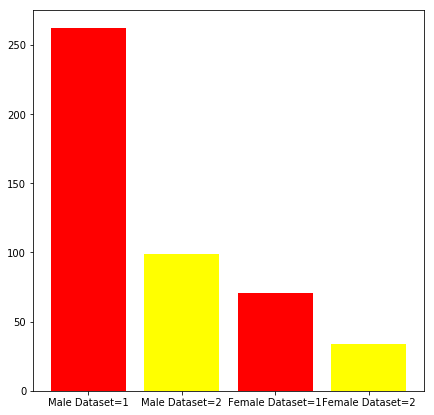

In [17]:
plt.figure(figsize=(7,7))
plt.bar(["Male Dataset=1"],[df.query("Dataset=='1'")['Male'].sum()],color='red')
plt.bar(["Male Dataset=2"],[df.query("Dataset=='2'")['Male'].sum()],color='yellow')
plt.bar(["Female Dataset=1"],[df.query("Dataset=='1'")['Female'].sum()],color='red')
plt.bar(["Female Dataset=2"],[df.query("Dataset=='2'")['Female'].sum()],color='yellow')

# Plotting Correlation Graph

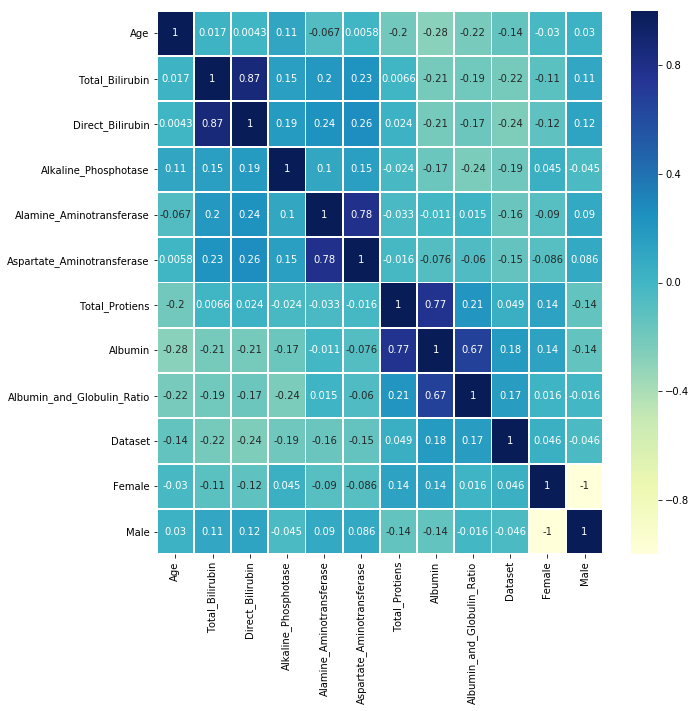

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
corr_mat=df.corr()
sns.heatmap(corr_mat, cbar = True,annot=True,linewidths=1, ax=ax ,cmap="YlGnBu")

## Some features are directly correlated like: 
### 1. Total_Bilirubin and Direct_Bilirubin
### 2. Aspartate_Aminotransferase and Alamine_Aminotransferase.
## So dropping Direct_Bilirubin and Aspartate_Aminotransferase 

In [19]:
X=df.drop(labels=['Dataset','Direct_Bilirubin','Aspartate_Aminotransferase'],axis=1)
y=df['Dataset']

# Split the data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,train_size=0.8)

C:\Users\1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(372, 9)
(94, 9)
(372,)
(94,)


# Classification using SVM

In [22]:
from sklearn.svm import SVC 
model=SVC(kernel='linear')  
model.fit(X_train,y_train)
p1=model.predict(X_test)
model.score(X_test,y_test)

0.7872340425531915

# Classification using LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
p2=model.predict(X_test)
model.score(X_test,y_test)

0.7659574468085106

# Classification using DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
p3=model.predict(X_test)
model.score(X_test,y_test) 

0.7872340425531915

# Classification using KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
knn.score(X_test, y_test)

0.7659574468085106

# Classification using Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train)  
gnb.score(X_test, y_test)

0.5

# Classification using Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=61)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6808510638297872

# Finally!!! Training on whole train.csv and Predicting on test.csv

In [28]:
df_train=pd.read_csv("data/problem_1/train.csv")
df_test=pd.read_csv("data/problem_1/test.csv")

mean=df_train['Albumin_and_Globulin_Ratio'].mean()
df_train.fillna(mean,inplace=True)
mean=df_test['Albumin_and_Globulin_Ratio'].mean()
df_test.fillna(mean,inplace=True)

dum_train=pd.get_dummies(df_train['Gender'],dtype='int')
dum_test=pd.get_dummies(df_test['Gender'],dtype='int')

df_train = pd.concat([df_train,dum_train],axis=1)
df_test = pd.concat([df_test,dum_test],axis=1)

df_train.drop(labels=['Gender'],inplace=True,axis=1)
df_test.drop(labels=['Gender','Direct_Bilirubin','Aspartate_Aminotransferase'],inplace=True,axis=1)

X=df_train.drop(labels=['Dataset','Direct_Bilirubin','Aspartate_Aminotransferase'],axis=1)
y=df_train['Dataset']

# Using mixture of 3 Models:
### 1. SVM
### 2. Decision Tree
### 3. KNN

In [29]:
from sklearn.svm import SVC 
model=SVC(kernel='linear')  
model.fit(X,y)
p1=model.predict(df_test)

from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(max_depth = 2).fit(X,y)
p2=model.predict(df_test)

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=2).fit(X,y)
p3=model.predict(df_test)

# Taking Mode value of Predictions done by 3 Models

In [30]:
import statistics
l=[]
for i in range(len(p1)):
    l.append((statistics.mode((p1[i],p2[i],p3[i]))))
save_df=pd.DataFrame(l)

# Saving the Prediction in Csv file

In [31]:
save_df.to_csv("final_problem_1.csv",sep=',')